In [1]:
# Neste experimento iremos automatizar o processo de escolha das melhores features com o RFE para reduzir as dimensões do dataset e realizar a classificação com o Random Forest.

import pandas as pd

# Leitura do dataset
resultados_exames = pd.read_csv(".\data-set\exames.csv")

# Exibição dos 10 primeiros registros
resultados_exames.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [2]:
# Exibindo a dimensionalidade do dataframe
resultados_exames.shape

(569, 35)

In [3]:
# Importação das bibliotecas para splits dos datasets
from sklearn.model_selection import train_test_split
from numpy import random

# Criando o SEED para controlar a aleatoriedade
SEED = 1234
random.seed(SEED)

# Separando as colunas de id, diagnóstico e exame_33 do dataset
# id está sendo excluída por não agregar valor ao processo de treinamento
# Á coluna diagnóstico está sendo escluída por ser o target da minha classificação
# A coluna exame_33 está sendo escluída por só conter valores vazios
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico','exame_33', 'exame_4', 'exame_29'])
valores_exames.head(10)

# Capturando agora só as colunas de id e diagnóstico
diagnostico = resultados_exames.diagnostico

In [5]:
# Uma outra forma de reduzir o número de features é por meio do RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

SEED = 1234
random.seed = SEED

# Segregando os dados em bases de treino e teste e setando o tamanho da base de teste para 30% (o padrão da base de teste é de 25%)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)

# Realizando a classificação
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

# Criando o selecionador de features
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)

# Treinando com RFE
selecionador_rfe.fit(treino_x, treino_y)

# Separando as bases de treino e teste depois do RFE
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

# Classificando novamente com a features selecionadas pelo RFE
classificador.fit(treino_rfe, treino_y)

RandomForestClassifier(random_state=1234)

Resultado da classificação 92.40%


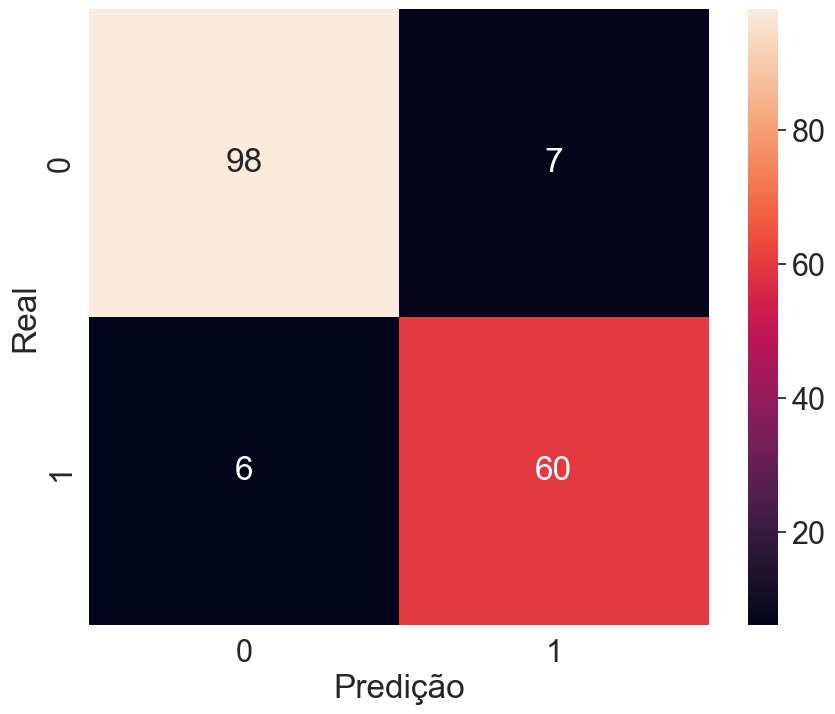

In [8]:
# Analisando os resultados com a matriz de confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Gerando a matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

# Plotando a matriz de confusão
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))